In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
vehicle=pd.read_excel("data.csv.xlsx")
vehicle

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443
...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79,2625,18.6,1982,ford ranger,11.904024


# from dataset Kilometer_per_liter seems to be dependent variable

In [3]:
vehicle_data=pd.DataFrame(vehicle)
vehicle_data

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443
...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79,2625,18.6,1982,ford ranger,11.904024


In [4]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


# no null values

In [5]:
#changing ? into null values and dropping them
vehicle=vehicle_data.replace({"?":np.nan}).dropna()

In [6]:
#changing datatype of horsepower into float
vehicle["horsepower"]=pd.to_numeric(vehicle["horsepower"],downcast="float")

In [7]:
#dropping unnessasary columns
vehicle.drop(columns=["year","name"],inplace=True)

In [8]:
vehicle

,origin,cylinders,displacement,horsepower,weight,acceleration,Kilometer_per_liter
0,1,8,307.0,130.0,3504,12.0,7.652587
1,1,8,350.0,165.0,3693,11.5,6.377156
2,1,8,318.0,150.0,3436,11.0,7.652587
3,1,8,304.0,150.0,3433,12.0,6.802299
4,1,8,302.0,140.0,3449,10.5,7.227443
...,...,...,...,...,...,...,...
393,1,4,140.0,86.0,2790,15.6,11.478880
394,2,4,97.0,52.0,2130,24.6,18.706323
395,1,4,135.0,84.0,2295,11.6,13.604599
396,1,4,120.0,79.0,2625,18.6,11.904024


In [9]:
vehicle.describe()

,origin,cylinders,displacement,horsepower,weight,acceleration,Kilometer_per_liter
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,1.576531,5.471939,194.411990,104.469391,2977.584184,15.541327,9.967885
std,0.805518,1.705783,104.644004,38.491138,849.402560,2.758864,3.318250
min,1.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,3.826293
25%,1.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,7.227443
50%,1.000000,4.000000,151.000000,93.500000,2803.500000,15.500000,9.672019
75%,2.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,12.329168
max,3.000000,8.000000,455.000000,230.000000,5140.000000,24.800000,19.811697


# Checking correlation

In [10]:
vehicle_corr=vehicle.corr()
vehicle_corr.round(2)

,origin,cylinders,displacement,horsepower,weight,acceleration,Kilometer_per_liter
origin,1.00,-0.57,-0.61,-0.46,-0.59,0.21,0.57
cylinders,-0.57,1.00,0.95,0.84,0.90,-0.50,-0.78
displacement,-0.61,0.95,1.00,0.90,0.93,-0.54,-0.81
horsepower,-0.46,0.84,0.90,1.00,0.86,-0.69,-0.78
weight,-0.59,0.90,0.93,0.86,1.00,-0.42,-0.83
acceleration,0.21,-0.50,-0.54,-0.69,-0.42,1.00,0.42
Kilometer_per_liter,0.57,-0.78,-0.81,-0.78,-0.83,0.42,1.00


# correlation seems to be high with origin  by taking Kilometer_per_liter as dep variable

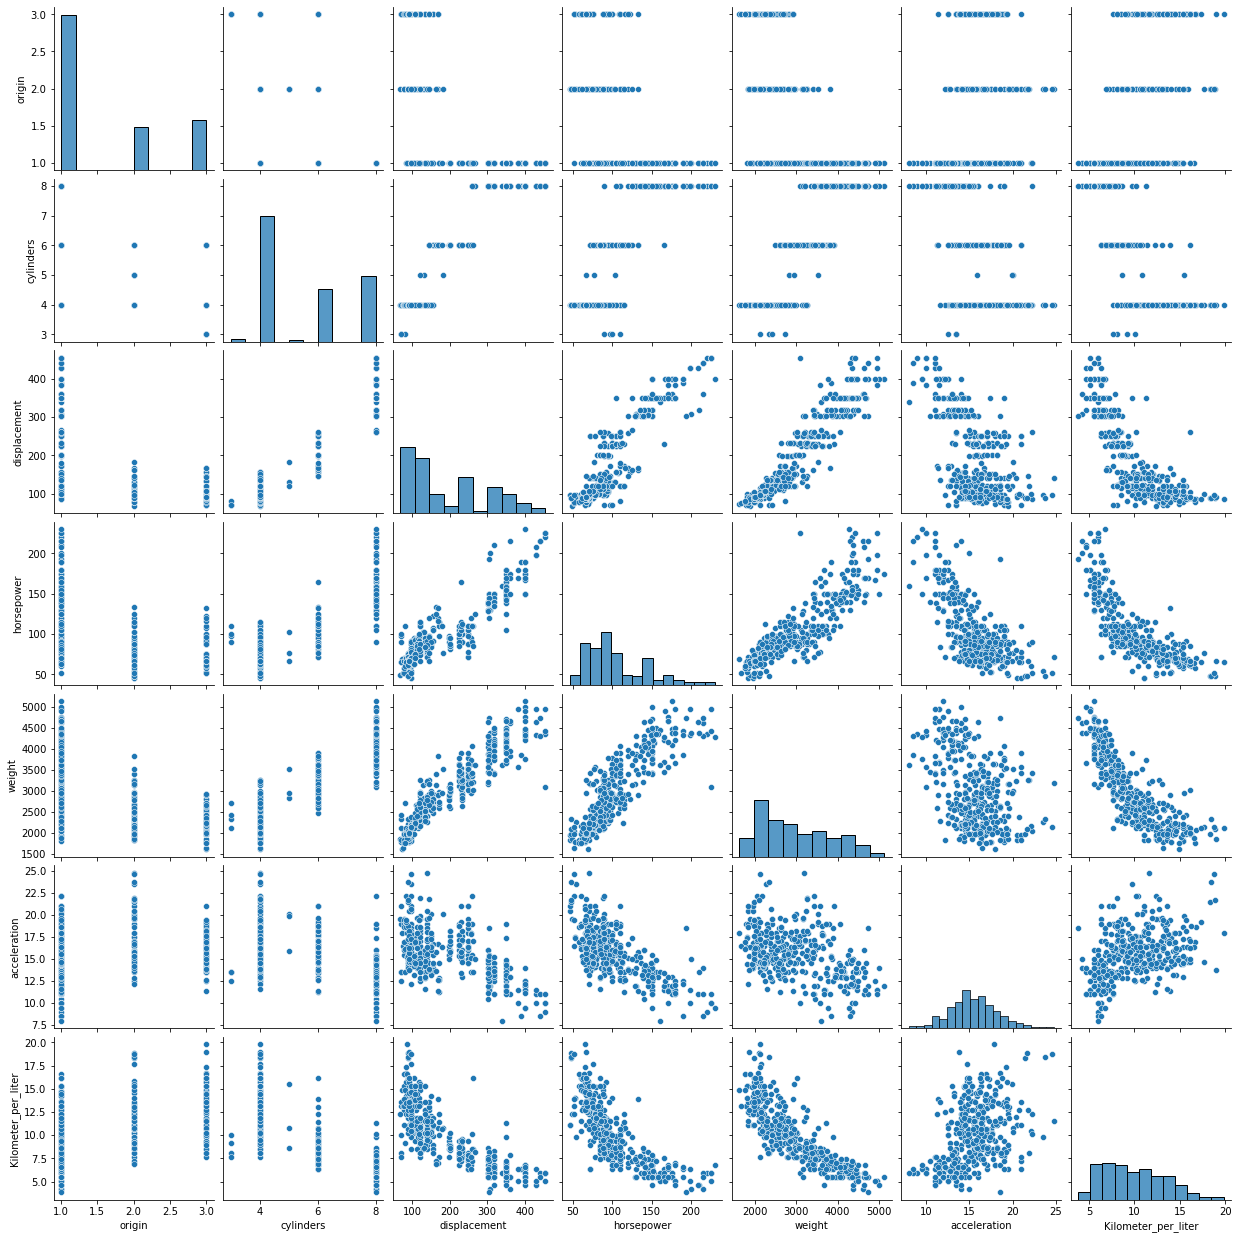

In [11]:
sns.pairplot(vehicle);

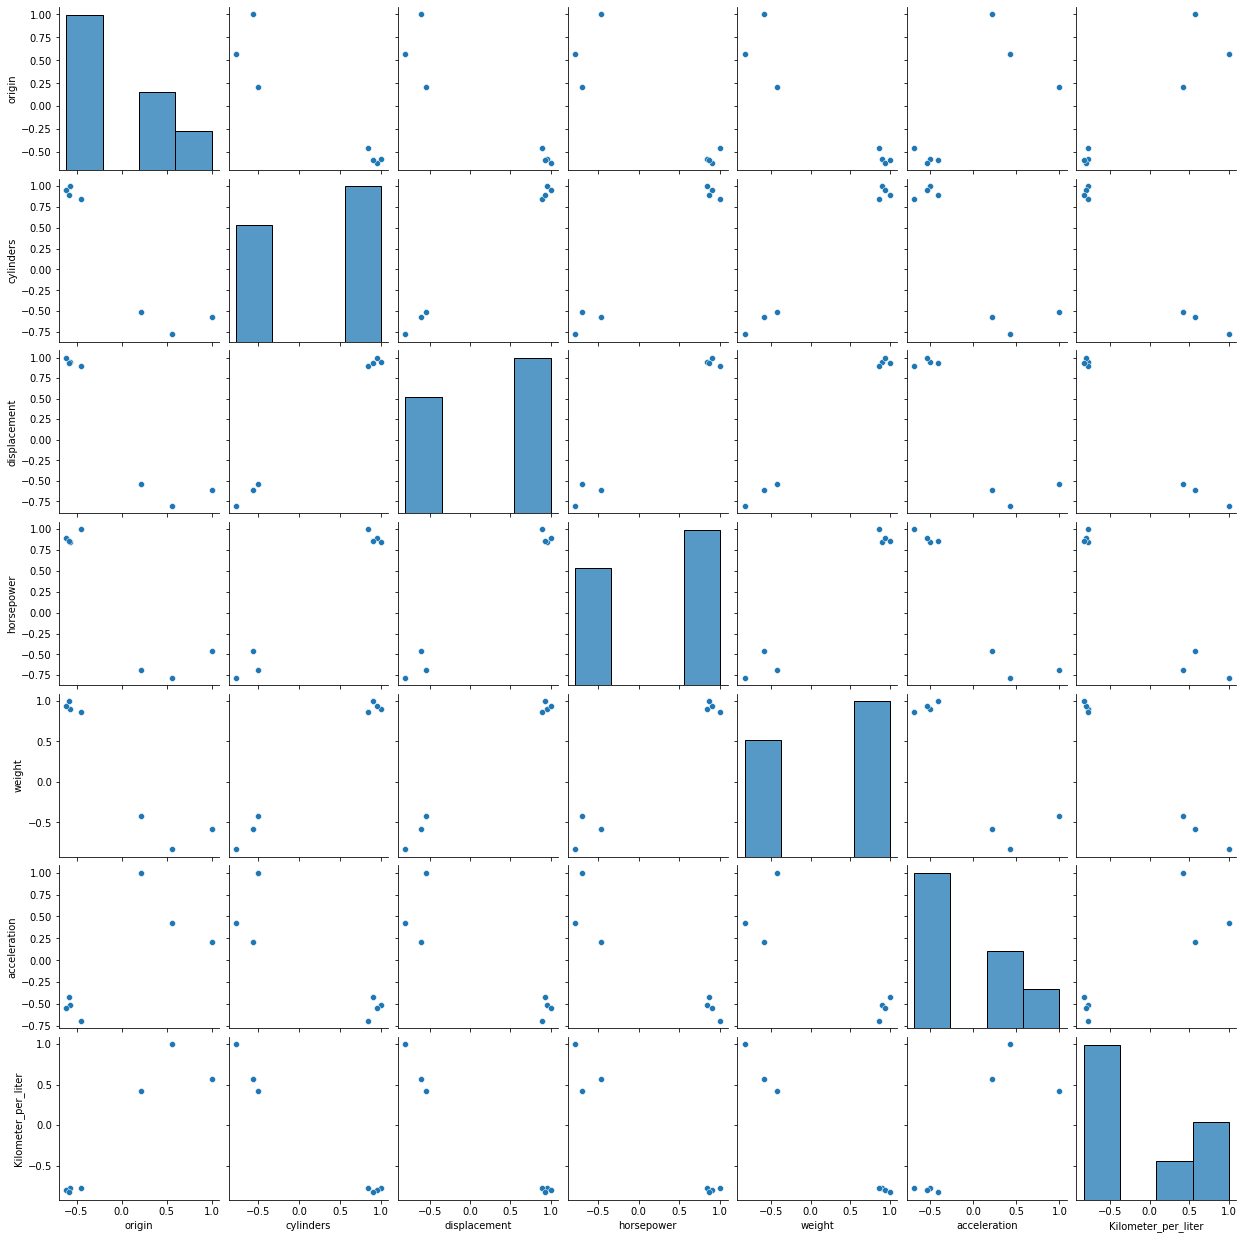

In [12]:
sns.pairplot(vehicle_corr);

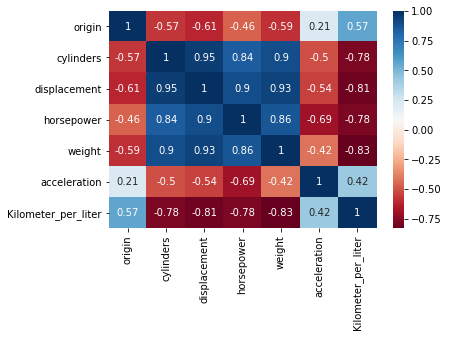

In [13]:
sns.heatmap(vehicle_corr,annot=True,cmap="RdBu");

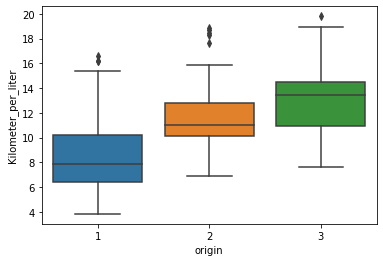

In [14]:
sns.boxplot(x="origin",y="Kilometer_per_liter",data=vehicle);

# outlier seems to be high in origin=2

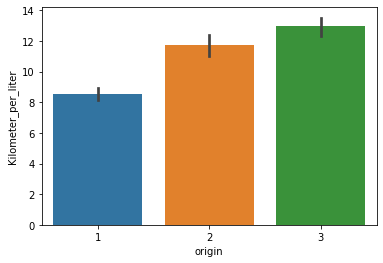

In [38]:
sns.barplot(x="origin",y="Kilometer_per_liter",data=vehicle);    

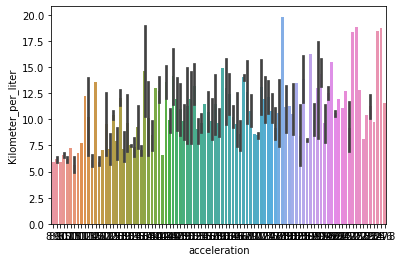

In [41]:
sns.barplot(x="acceleration",y="Kilometer_per_liter",data=vehicle);

# Seperation of dep and indep variables

In [42]:
y_dep=vehicle.Kilometer_per_liter
x_indep=vehicle.drop("Kilometer_per_liter",axis=1)

# Model creation by finding OLS and fitting,then checking p,r-sq values

In [44]:
import statsmodels.api as sm
model=sm.OLS(y_dep,x_indep)
my_fit=model.fit()

In [45]:
my_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Kilometer_per_liter   R-squared (uncentered):                   0.954
Model:                             OLS   Adj. R-squared (uncentered):              0.953
Method:                  Least Squares   F-statistic:                              1326.
Date:                 Wed, 25 Aug 2021   Prob (F-statistic):                   4.64e-254
Time:                         19:23:43   Log-Likelihood:                         -875.83
No. Observations:                  392   AIC:                                      1764.
Df Residuals:                      386   BIC:                                      1787.
Df Model:                            6                                                  
Covariance Type:             nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
origin           1.2389      0.184      6.741      0.000       0.878       1.600
cylinders        0.7222      0.207      3.486      0.001       0.315       1.130
displacement    -0.0125      0.005     -2.533      0.012      -0.022      -0.003
horsepower       0.0352      0.008      4.548      0.000       0.020       0.050
weight          -0.0025      0.000     -5.643      0.000      -0.003      -0.002
acceleration     0.6479      0.041     15.702      0.000       0.567       0.729
==============================================================================
Omnibus:                       17.389   Durbin-Watson:                   1.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.608
Skew:                           0.405   Prob(JB):                     2.03e-05
Kurtosis:                       3.816   Cond. No.                     5.89e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# here r-sq value is 0.954 so this dataset have strong correlation and no p value is greater than 0.5 so dont need to remove any variable 

# PREDICTION

In [48]:
y_pred=my_fit.predict(x_indep)
y_pred

0       6.865118
1       6.769440
2       6.952690
3       7.782759
4       6.444008
         ...    
393     8.610721
394    16.653761
395     7.236321
396    10.965974
397    11.367294
Length: 392, dtype: float64

# so now we know the machine calculated values but we need to check if it is correct or not so we are using machine learning concepts

# MACHINE LEARNING

In [50]:
import sklearn 
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# splitting values for training and testing

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x_indep,y_dep,test_size=0.3,random_state=1)

In [93]:
x_test

,origin,cylinders,displacement,horsepower,weight,acceleration
82,3,4,120.0,97.0,2506,14.5
167,3,4,97.0,75.0,2171,16.0
356,3,4,108.0,75.0,2350,16.8
120,2,4,121.0,112.0,2868,15.5
385,3,4,91.0,67.0,1995,16.2
...,...,...,...,...,...,...
60,1,4,140.0,90.0,2408,19.5
12,1,8,400.0,150.0,3761,9.5
305,1,4,151.0,90.0,2670,16.0
165,1,8,262.0,110.0,3221,13.5


# Importing linear regression for creating model and prediction

In [94]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [95]:
model=LinearRegression()

In [96]:
fit=model.fit(x_train,y_train)
fit

LinearRegression()

In [97]:
y_pred1=fit.predict(x_test)
y_pred1

array([11.79066114, 12.9581304 , 12.67076418, 10.15920544, 13.48334961,
       11.72763078, 12.53668204,  5.94872652, 12.46667823, 12.86910163,
        8.77450386, 12.25678153,  7.20647314, 13.56127707, 10.87363359,
        7.48469118, 10.97916848, 13.02522612,  4.49374821,  9.82579183,
       12.06625665,  8.32544117,  7.50985307,  5.61848152,  4.91004341,
        6.64222772, 13.56136732,  8.31875386,  9.28626959, 10.93855791,
        7.66678646, 10.39056823,  5.32105886,  9.67625544,  8.68174884,
        6.01469511,  8.21892906,  8.62016773, 13.45554163, 12.69143722,
        5.15305595,  5.28264137, 10.45862927,  9.85423824, 10.02143706,
        8.18887695,  4.55998135, 13.62865323,  9.05429607,  3.8544805 ,
        6.89794175,  9.43969121, 10.52831441, 11.03425326, 13.18142051,
        9.37809116,  9.65598267, 10.69555046, 10.5382758 , 14.05463235,
       10.07370594, 11.46894036, 13.79026489,  8.45036573,  9.76051827,
        9.43808014, 10.21647751,  6.71643208, 12.73925306,  3.83

In [98]:
model.score(x_test,y_test) 

0.7295775706920559

In [99]:
model.score(x_train,y_train)

0.7104995419744988

# BY checking accuracy i conclude test dataset have good accuracy

In [100]:
comp=pd.DataFrame({"actual":y_test,"predicted":y_pred1})
comp

,actual,predicted
82,9.778305,11.790661
167,12.329168,12.958130
356,13.774656,12.670764
120,8.077730,10.159205
385,16.155461,13.483350
...,...,...
60,8.502874,11.310742
12,6.377156,6.914128
305,12.074081,10.506881
165,8.502874,8.617348


# calculating error

In [101]:
res=y_pred1-y_test
res

82     2.012356
167    0.628963
356   -1.103892
120    2.081475
385   -2.672111
         ...   
60     2.807868
12     0.536972
305   -1.567200
165    0.114474
92     0.007939
Name: Kilometer_per_liter, Length: 118, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Kilometer_per_liter', ylabel='Density'>

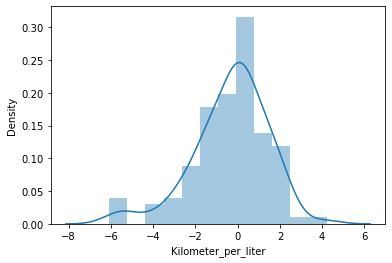

In [102]:
sns.distplot(res)

In [107]:
from sklearn.metrics import mean_squared_error as ms
mean_sqr=ms(y_test,y_pred1)
mean_sqr

3.249585701022922

In [104]:
# RMSE
root_mean_sqr=np.sqrt(mean_sqr)
root_mean_sqr

1.8026607282078684

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


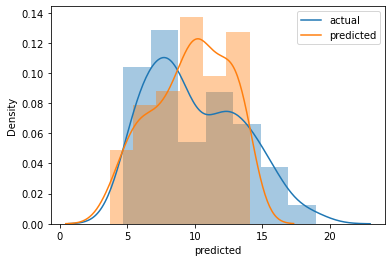

In [105]:
sns.distplot(comp["actual"]);
sns.distplot(comp["predicted"]);
plt.legend(["actual","predicted"])

<AxesSubplot:>

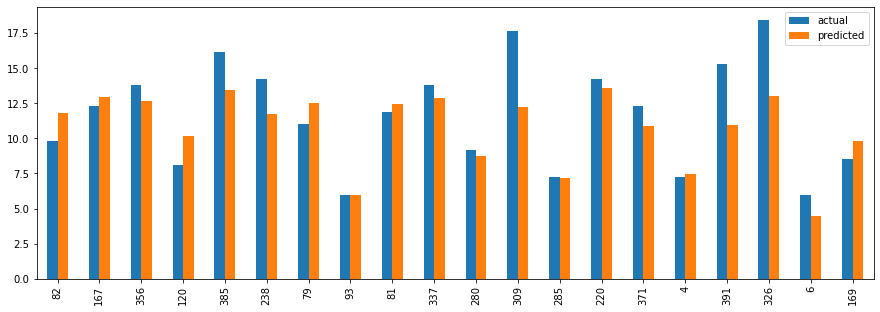

In [108]:
com_g=comp.head(20)
com_g.plot(kind="bar",figsize=[15,5])

# from barplot,predicted values are mostly nearer to actual values

#                                      ASSUMPTIONS..................................................

# NORMALITY CHECK

((array([-2.52065032, -2.19131491, -2.00161738, -1.86470486, -1.75581693,
         -1.66447993, -1.58523282, -1.51485025, -1.45126092, -1.39305187,
         -1.33921407, -1.2890006 , -1.24184226, -1.19729485, -1.15500461,
         -1.11468501, -1.0761005 , -1.03905491, -1.00338303, -0.96894431,
         -0.93561808, -0.90329991, -0.87189872, -0.84133459, -0.81153691,
         -0.78244296, -0.75399674, -0.72614796, -0.69885132, -0.67206575,
         -0.64575393, -0.61988179, -0.59441811, -0.56933416, -0.54460346,
         -0.52020147, -0.4961054 , -0.47229402, -0.44874749, -0.42544719,
         -0.40237564, -0.37951633, -0.35685365, -0.33437281, -0.31205971,
         -0.28990093, -0.2678836 , -0.24599539, -0.22422441, -0.20255921,
         -0.18098868, -0.15950204, -0.1380888 , -0.1167387 , -0.09544168,
         -0.07418787, -0.05296752, -0.031771  , -0.01058875,  0.01058875,
          0.031771  ,  0.05296752,  0.07418787,  0.09544168,  0.1167387 ,
          0.1380888 ,  0.15950204,  0.

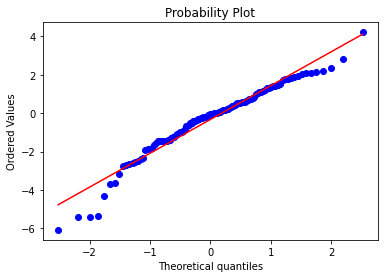

In [110]:
import scipy.stats as st
st.probplot(res,dist="norm",plot=plt)

# good accuracy of prediction

# NO AUTOCORRELATION

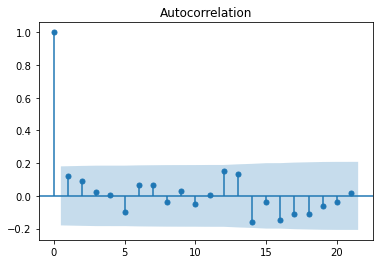

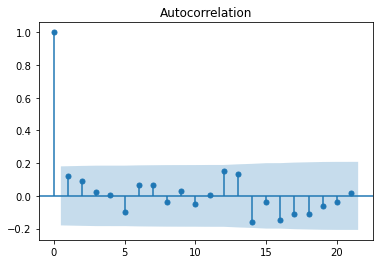

In [114]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(res)

# no values are greater than 0.5 so there is not equal values present in dependent

# MULTI COLINEARITY

In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vifm
def calculate_vif(x):
    vif=pd.DataFrame()
    vif['features']=x.columns
    vif['VIF_Values']=[vifm(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [116]:
calculate_vif(vehicle)

,features,VIF_Values
0,origin,8.937792
1,cylinders,109.908759
2,displacement,90.883447
3,horsepower,59.173992
4,weight,150.930316
5,acceleration,52.537059
6,Kilometer_per_liter,21.605023


# cylinder and weight have high multi colinearity or in otherwords high impact on correlation

# Using optimizer to find even the best fit for the model

# L2 Ridge

In [118]:
from sklearn.linear_model import Ridge

In [127]:
ridge_model=Ridge(alpha=75,max_iter=100)

In [128]:
ridge_model.fit(x_train,y_train)

Ridge(alpha=75, max_iter=100)

In [129]:
ridge_model.predict(x_test)

array([11.52554309, 12.71179012, 12.37460767, 10.17943505, 13.24083927,
       12.04717596, 12.53148005,  5.9956792 , 12.24242475, 12.56853927,
        8.87269638, 12.30004305,  7.25071293, 13.33905774, 11.06134103,
        7.62549571, 11.2054543 , 12.92500081,  4.2916874 ,  9.88690255,
       12.05311108,  8.28395072,  7.61231286,  5.63763689,  4.73442021,
        6.56944636, 13.26874198,  8.37138731,  9.3819815 , 11.16580749,
        7.77588713, 10.52901189,  5.27780291,  9.77967724,  8.737844  ,
        6.10299612,  8.24319216,  8.64682724, 13.22795141, 12.4913248 ,
        5.03269058,  5.13196833, 10.30641582,  9.91555665, 10.09657883,
        8.1337868 ,  4.32253634, 13.37181172,  9.14128582,  3.65918941,
        7.03753302,  9.5684858 , 10.66596571, 11.27858493, 13.22314177,
        9.65679125, 10.01072632, 10.83872375, 10.71758848, 13.79801113,
        9.987606  , 11.48809076, 13.52569249,  8.61136027,  9.77847202,
        9.46124131, 10.10585104,  6.798151  , 12.81439401,  3.75

In [130]:
ridge_model.score(x_test,y_test)

0.7291924297934178

# accuracy is same as checked using linear regression so i conclude this is best fit

# L1 LASSO

In [131]:
from sklearn.linear_model import Lasso

In [132]:
lasso_model=Lasso(alpha=75,max_iter=100)
lasso_model.fit(x_train,y_train)

Lasso(alpha=75, max_iter=100)

In [133]:
lasso_model.predict(x_test)

array([11.33363156, 12.35927508, 11.81124466, 10.22532423, 12.89812063,
       12.65319084, 12.30416588,  6.0339631 , 12.00106525, 11.99494201,
        9.07109257, 12.44193889,  7.24942721, 13.05120175, 11.27546073,
        8.44652159, 11.75001221, 11.857169  ,  5.67575327, 10.0844896 ,
       12.1296534 ,  7.88624468,  8.59960271,  6.25439991,  5.71555436,
        6.94326497, 12.74503951,  7.82807385,  9.70178679, 11.70408788,
        8.52000053, 10.61721191,  5.22263315, 10.32635777,  8.52000053,
        6.10131879,  7.41781645,  8.18322206, 12.98996931, 12.4848016 ,
        5.76454032,  5.58084297, 10.4120832 , 10.12429069, 10.46719241,
        7.58620568,  3.70713003, 12.97466119,  9.10783204,  4.50927512,
        7.76377978,  9.34663859, 10.8070325 , 11.9796339 , 13.357364  ,
        9.87017603, 11.06114716, 11.08564014, 11.18055044, 13.49513701,
        9.77526573, 11.4622197 , 12.95935308,  8.70369787,  9.56095216,
        9.17518773,  8.99455201,  7.956662  , 13.1124342 ,  3.83

In [134]:
lasso_model.score(x_test,y_test)

0.7124650229890934

# this shows only one percent less than previous

# Now we can check our best fit even by using another optimizer

# STOCHARTIC GRADIENT DESCENT(SGD)

In [135]:
from sklearn.preprocessing import StandardScaler
norm=StandardScaler()
x_train=norm.fit_transform(x_train)
x_test=norm.fit_transform(x_test)

# the data is made into normally distributed with mean=0 and std with 1

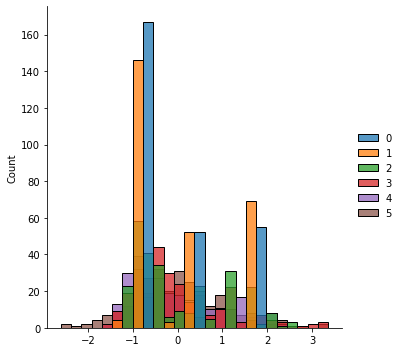

In [138]:
sns.displot(x_train);

In [139]:
from sklearn.linear_model import SGDRegressor
model=SGDRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [140]:
model.score(x_test,y_test)

0.7356752087233532

# By using SGD the accuracy is found to be good accuracy or in otherwords  SGD found the best fit with 0.73 accuracy